In [404]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statistics import mode

In [470]:
data = pd.read_csv('Downloads/titanic/train.csv')

In [471]:
df_test = pd.read_csv('Downloads/titanic/test.csv')

In [472]:
data[data['SibSp'] >1]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
16,17,0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.1250,NaN,Q
24,25,0,3,"Palsson, Miss. Torborg Danira",female,8.0,3,1,349909,21.0750,NaN,S
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
38,39,0,3,"Vander Planke, Miss. Augusta Maria",female,18.0,2,0,345764,18.0000,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
824,825,0,3,"Panula, Master. Urho Abraham",male,2.0,4,1,3101295,39.6875,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.5500,NaN,S
850,851,0,3,"Andersson, Master. Sigvard Harald Elias",male,4.0,4,2,347082,31.2750,NaN,S
860,861,0,3,"Hansen, Mr. Claus Peter",male,41.0,2,0,350026,14.1083,NaN,S


In [407]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [473]:
data.loc[data.Age.isnull(), 'Age'] = data.groupby("Pclass").Age.transform('median')

In [474]:
data['Embarked'] = data['Embarked'].fillna(mode(data['Embarked']))

In [475]:
df_test.loc[df_test.Age.isnull(), 'Age'] = df_test.groupby("Pclass").Age.transform('median')
df_test['Embarked'] = df_test['Embarked'].fillna(mode(df_test['Embarked']))

In [476]:
df_test.loc[df_test.Fare.isnull(), 'Fare'] = df_test.groupby("Pclass").Fare.transform('median')

In [477]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [413]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [478]:
sex = pd.get_dummies(data['Sex'], drop_first=True)

In [479]:
embarked = pd.get_dummies(data['Embarked'], drop_first=True)

In [481]:
sex_test = pd.get_dummies(df_test['Sex'], drop_first=True)
embarked_test = pd.get_dummies(df_test['Embarked'], drop_first=True)

df_test = pd.concat([df_test, sex_test, embarked_test], axis=1)

In [480]:
data = pd.concat([data, sex, embarked], axis=1)

In [482]:
data['Honorific'] = data['Name'].apply(lambda x: x.partition(',')[-1].split()[0])

In [483]:
df_test['Honorific'] = df_test['Name'].apply(lambda x: x.partition(',')[-1].split()[0])

In [484]:
data['Honorific'].value_counts()

Mr.          517
Miss.        182
Mrs.         125
Master.       40
Dr.            7
Rev.           6
Col.           2
Major.         2
Mlle.          2
the            1
Sir.           1
Ms.            1
Jonkheer.      1
Lady.          1
Don.           1
Mme.           1
Capt.          1
Name: Honorific, dtype: int64

In [485]:
titles = ['Mr.', 'Miss.', 'Mrs.', 'Dr.', 'Col.', 'Master.']

In [486]:
titles

['Mr.', 'Miss.', 'Mrs.', 'Dr.', 'Col.', 'Master.']

In [487]:
def change_title(cols):
    if cols in titles:
        return cols
    else:
        return 'Other'
    

In [488]:
data['Honorific'] = data['Honorific'].apply(change_title)

In [489]:
df_test['Honorific'] = df_test['Honorific'].apply(change_title)

In [490]:
honorific = pd.get_dummies(data['Honorific'], drop_first=True)

In [491]:
honorific_test = pd.get_dummies(df_test['Honorific'], drop_first=True)

In [492]:
data = pd.concat([data, honorific], axis=1)

In [493]:
df_test = pd.concat([df_test, honorific_test], axis=1)

In [494]:
data['familySize'] = data['SibSp'] + data['Parch'] + 1

In [495]:
df_test['familySize'] = df_test['SibSp'] + df_test['Parch'] + 1

In [496]:
train_df = data.drop(['PassengerId', 'Name', 'Sex', 'SibSp', 'Parch', 'Ticket'], axis=1)

In [497]:
test_df = df_test.drop(['PassengerId', 'Name', 'Sex', 'SibSp', 'Parch', 'Ticket'], axis=1)

In [498]:
train_df.columns

Index(['Survived', 'Pclass', 'Age', 'Fare', 'Cabin', 'Embarked', 'male', 'Q',
       'S', 'Honorific', 'Dr.', 'Master.', 'Miss.', 'Mr.', 'Mrs.', 'Other',
       'familySize'],
      dtype='object')

In [499]:
train_df.drop(['Cabin', 'Embarked'], axis=1, inplace=True)

In [500]:
train_df.drop('Honorific', axis=1, inplace=True)

In [501]:
test_df.drop(['Cabin', 'Embarked'], axis=1, inplace=True)
test_df.drop('Honorific', axis=1, inplace=True)

,Pclass,Age,Fare,male,Q,S,Dr.,Master.,Miss.,Mr.,Mrs.,Other,Rev.,familySize
0,3,34.5,7.8292,1,1,0,0,0,0,1,0,0,0,1
1,3,47.0,7.0000,0,0,1,0,0,0,0,1,0,0,2
2,2,62.0,9.6875,1,1,0,0,0,0,1,0,0,0,1
3,3,27.0,8.6625,1,0,1,0,0,0,1,0,0,0,1
4,3,22.0,12.2875,0,0,1,0,0,0,0,1,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,3,24.0,8.0500,1,0,1,0,0,0,1,0,0,0,1
414,1,39.0,108.9000,0,0,0,0,0,0,0,0,1,0,1
415,3,38.5,7.2500,1,0,1,0,0,0,1,0,0,0,1
416,3,24.0,8.0500,1,0,1,0,0,0,1,0,0,0,1


In [224]:
#df_test

In [260]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,0,1


In [205]:
#df_t = df_test.drop(['PassengerId', 'Name', 'Sex', 'SibSp', 'Ticket', 'Cabin', 'Embarked'], axis=1)

In [225]:
#df_t

In [32]:
df_train

,Survived,Pclass,Age,Parch,Fare,male,Q,S
0,0,3,22.0,0,7.2500,1,0,1
1,1,1,38.0,0,71.2833,0,0,0
2,1,3,26.0,0,7.9250,0,0,1
3,1,1,35.0,0,53.1000,0,0,1
4,0,3,35.0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,13.0000,1,0,1
887,1,1,19.0,0,30.0000,0,0,1
888,0,3,NaN,2,23.4500,0,0,1
889,1,1,26.0,0,30.0000,1,0,0


In [4]:
sns.set_style('whitegrid')

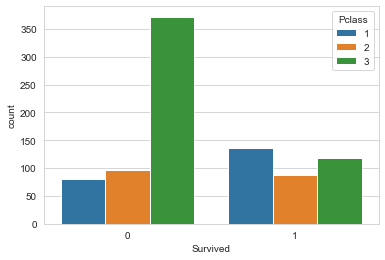

In [5]:
sns.countplot(x='Survived', hue='Pclass', data=data)

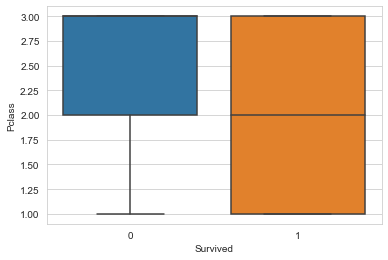

In [13]:
#data.hist()
#plt.show()

sns.boxplot(x="Survived", y="Pclass", data=data)

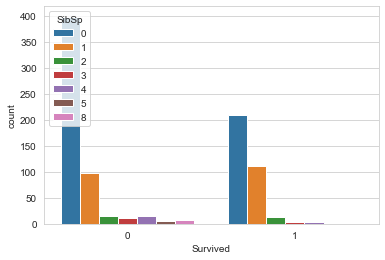

In [21]:
sns.countplot(x="Survived", hue="SibSp", data=data)

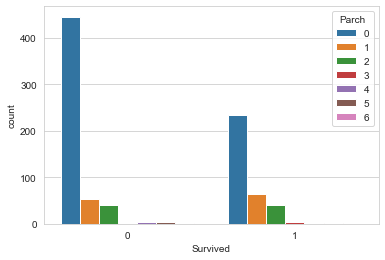

In [22]:
sns.countplot(x="Survived", hue="Parch", data=data)

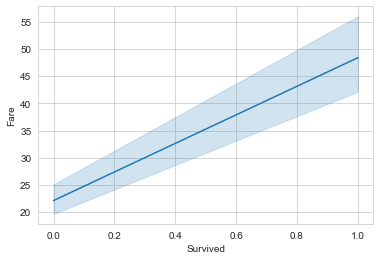

In [25]:
sns.lineplot(x="Survived", y="Fare", data=data)

In [ ]:
sns.boxplot(x="Survived", y="Fare", data=data)

In [207]:
df_t['Age'].isnull().sum()

0

In [34]:
df_train['Age'].isnull().sum()

0

In [209]:
df_t.isnull().sum()

Pclass    0
Age       0
Parch     0
Fare      1
male      0
Q         0
S         0
dtype: int64

In [503]:
train_df

,Survived,Pclass,Age,Fare,male,Q,S,Dr.,Master.,Miss.,Mr.,Mrs.,Other,familySize
0,0,3,22.0,7.2500,1,0,1,0,0,0,1,0,0,2
1,1,1,38.0,71.2833,0,0,0,0,0,0,0,1,0,2
2,1,3,26.0,7.9250,0,0,1,0,0,1,0,0,0,1
3,1,1,35.0,53.1000,0,0,1,0,0,0,0,1,0,2
4,0,3,35.0,8.0500,1,0,1,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,13.0000,1,0,1,0,0,0,0,0,1,1
887,1,1,19.0,30.0000,0,0,1,0,0,1,0,0,0,1
888,0,3,24.0,23.4500,0,0,1,0,0,1,0,0,0,4
889,1,1,26.0,30.0000,1,0,0,0,0,0,1,0,0,1


In [502]:
test_df

,Pclass,Age,Fare,male,Q,S,Dr.,Master.,Miss.,Mr.,Mrs.,Other,familySize
0,3,34.5,7.8292,1,1,0,0,0,0,1,0,0,1
1,3,47.0,7.0000,0,0,1,0,0,0,0,1,0,2
2,2,62.0,9.6875,1,1,0,0,0,0,1,0,0,1
3,3,27.0,8.6625,1,0,1,0,0,0,1,0,0,1
4,3,22.0,12.2875,0,0,1,0,0,0,0,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,3,24.0,8.0500,1,0,1,0,0,0,1,0,0,1
414,1,39.0,108.9000,0,0,0,0,0,0,0,0,1,1
415,3,38.5,7.2500,1,0,1,0,0,0,1,0,0,1
416,3,24.0,8.0500,1,0,1,0,0,0,1,0,0,1


In [396]:
test_df.isnull().sum()

Pclass        0
Age           0
Fare          0
male          0
Q             0
S             0
Dr.           0
Master.       0
Miss.         0
Mr.           0
Mrs.          0
Other         0
Rev.          0
familySize    0
dtype: int64

In [504]:
from sklearn.preprocessing import StandardScaler

Scaler = StandardScaler()

,Survived,Pclass,Age,Fare,male,Q,S,Honorific,Dr.,Major.,Master.,Miss.,Mlle.,Mr.,Mrs.,Other,Rev.,familySize
0,0,3,22.0,7.2500,1,0,1,Mr.,0,0,0,0,0,1,0,0,0,2
1,1,1,38.0,71.2833,0,0,0,Mrs.,0,0,0,0,0,0,1,0,0,2
2,1,3,26.0,7.9250,0,0,1,Miss.,0,0,0,1,0,0,0,0,0,1
3,1,1,35.0,53.1000,0,0,1,Mrs.,0,0,0,0,0,0,1,0,0,2
4,0,3,35.0,8.0500,1,0,1,Mr.,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,13.0000,1,0,1,Rev.,0,0,0,0,0,0,0,0,1,1
887,1,1,19.0,30.0000,0,0,1,Miss.,0,0,0,1,0,0,0,0,0,1
888,0,3,24.0,23.4500,0,0,1,Miss.,0,0,0,1,0,0,0,0,0,4
889,1,1,26.0,30.0000,1,0,0,Mr.,0,0,0,0,0,1,0,0,0,1


In [505]:
Scaler.fit(train_df.drop('Survived', axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [506]:
scaled_features = Scaler.transform(train_df.drop('Survived', axis=1))

In [546]:
test_scaled_features = Scaler.transform(test_df)

In [544]:
df_feat = pd.DataFrame(scaled_features, columns=[train_df.drop('Survived', axis=1).columns])

In [549]:
test_df_feat = pd.DataFrame(test_scaled_features, columns=[test_df.columns])

In [545]:
df_feat

,Pclass,Age,Fare,male,Q,S,Dr.,Master.,Miss.,Mr.,Mrs.,Other,familySize
0,0.827377,-0.533834,-0.502445,0.737695,-0.307562,0.615838,-0.088986,-0.216803,-0.506655,0.850532,-0.403962,-0.143592,0.059160
1,-1.566107,0.674891,0.786845,-1.355574,-0.307562,-1.623803,-0.088986,-0.216803,-0.506655,-1.175735,2.475480,-0.143592,0.059160
2,0.827377,-0.231653,-0.488854,-1.355574,-0.307562,0.615838,-0.088986,-0.216803,1.973729,-1.175735,-0.403962,-0.143592,-0.560975
3,-1.566107,0.448255,0.420730,-1.355574,-0.307562,0.615838,-0.088986,-0.216803,-0.506655,-1.175735,2.475480,-0.143592,0.059160
4,0.827377,0.448255,-0.486337,0.737695,-0.307562,0.615838,-0.088986,-0.216803,-0.506655,0.850532,-0.403962,-0.143592,-0.560975
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,-0.369365,-0.156107,-0.386671,0.737695,-0.307562,0.615838,-0.088986,-0.216803,-0.506655,-1.175735,-0.403962,6.964194,-0.560975
887,-1.566107,-0.760469,-0.044381,-1.355574,-0.307562,0.615838,-0.088986,-0.216803,1.973729,-1.175735,-0.403962,-0.143592,-0.560975
888,0.827377,-0.382743,-0.176263,-1.355574,-0.307562,0.615838,-0.088986,-0.216803,1.973729,-1.175735,-0.403962,-0.143592,1.299429
889,-1.566107,-0.231653,-0.044381,0.737695,-0.307562,-1.623803,-0.088986,-0.216803,-0.506655,0.850532,-0.403962,-0.143592,-0.560975


In [550]:
test_df_feat

,Pclass,Age,Fare,male,Q,S,Dr.,Master.,Miss.,Mr.,Mrs.,Other,familySize
0,0.827377,0.410482,-0.490783,0.737695,3.251373,-1.623803,-0.088986,-0.216803,-0.506655,0.850532,-0.403962,-0.143592,-0.560975
1,0.827377,1.354798,-0.507479,-1.355574,-0.307562,0.615838,-0.088986,-0.216803,-0.506655,-1.175735,2.475480,-0.143592,0.059160
2,-0.369365,2.487977,-0.453367,0.737695,3.251373,-1.623803,-0.088986,-0.216803,-0.506655,0.850532,-0.403962,-0.143592,-0.560975
3,0.827377,-0.156107,-0.474005,0.737695,-0.307562,0.615838,-0.088986,-0.216803,-0.506655,0.850532,-0.403962,-0.143592,-0.560975
4,0.827377,-0.533834,-0.401017,-1.355574,-0.307562,0.615838,-0.088986,-0.216803,-0.506655,-1.175735,2.475480,-0.143592,0.679295
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,0.827377,-0.382743,-0.486337,0.737695,-0.307562,0.615838,-0.088986,-0.216803,-0.506655,0.850532,-0.403962,-0.143592,-0.560975
414,-1.566107,0.750436,1.544246,-1.355574,-0.307562,-1.623803,-0.088986,-0.216803,-0.506655,-1.175735,-0.403962,6.964194,-0.560975
415,0.827377,0.712663,-0.502445,0.737695,-0.307562,0.615838,-0.088986,-0.216803,-0.506655,0.850532,-0.403962,-0.143592,-0.560975
416,0.827377,-0.382743,-0.486337,0.737695,-0.307562,0.615838,-0.088986,-0.216803,-0.506655,0.850532,-0.403962,-0.143592,-0.560975


In [557]:
#Logistic Regression

X = df_feat
y = train_df['Survived']

In [100]:
from sklearn.model_selection import train_test_split

In [558]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [311]:
from sklearn.linear_model import LogisticRegression

In [559]:
logmodel = LogisticRegression()

In [560]:
logmodel.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [561]:
lr_predict = logmodel.predict(X_test)

In [50]:
from sklearn.metrics import confusion_matrix,classification_report

In [562]:
print(confusion_matrix(y_test, lr_predict))
print(classification_report(y_test, lr_predict))

[[146  17]
 [ 22  83]]
              precision    recall  f1-score   support

           0       0.87      0.90      0.88       163
           1       0.83      0.79      0.81       105

    accuracy                           0.85       268
   macro avg       0.85      0.84      0.85       268
weighted avg       0.85      0.85      0.85       268



In [53]:
# KNN Classifier

from sklearn.neighbors import KNeighborsClassifier

In [564]:
knn = KNeighborsClassifier(n_neighbors=1)

In [565]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [566]:
knn_predict = knn.predict(X_test)

In [567]:
print(confusion_matrix(y_test, knn_predict))
print(classification_report(y_test, knn_predict))

[[127  36]
 [ 35  70]]
              precision    recall  f1-score   support

           0       0.78      0.78      0.78       163
           1       0.66      0.67      0.66       105

    accuracy                           0.74       268
   macro avg       0.72      0.72      0.72       268
weighted avg       0.74      0.74      0.74       268



In [568]:
error_rate = []

In [569]:
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

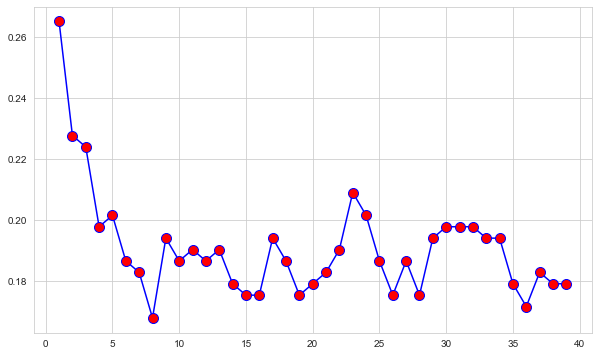

In [570]:
plt.figure(figsize=(10, 6))
plt.plot(range(1,40), error_rate, color='blue', marker = 'o', markerfacecolor='red', markersize=10)

In [571]:
knn = KNeighborsClassifier(n_neighbors=8)

knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
print(confusion_matrix(y_test, knn_pred))
print(classification_report(y_test, knn_pred))

[[152  11]
 [ 34  71]]
              precision    recall  f1-score   support

           0       0.82      0.93      0.87       163
           1       0.87      0.68      0.76       105

    accuracy                           0.83       268
   macro avg       0.84      0.80      0.82       268
weighted avg       0.84      0.83      0.83       268



In [62]:
#decision Tree
from sklearn.tree import DecisionTreeClassifier

In [572]:
dtree = DecisionTreeClassifier()

In [573]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [574]:
dtree_predict = dtree.predict(X_test)

In [575]:
print(confusion_matrix(y_test, dtree_predict))
print(classification_report(y_test, dtree_predict))

[[143  20]
 [ 34  71]]
              precision    recall  f1-score   support

           0       0.81      0.88      0.84       163
           1       0.78      0.68      0.72       105

    accuracy                           0.80       268
   macro avg       0.79      0.78      0.78       268
weighted avg       0.80      0.80      0.80       268



In [67]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

In [576]:
rdforest = RandomForestClassifier(n_estimators=200)

In [577]:
rdforest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [578]:
rdforest_predict = rdforest.predict(X_test)

In [579]:
print(confusion_matrix(y_test, rdforest_predict))
print(classification_report(y_test, rdforest_predict))

[[143  20]
 [ 34  71]]
              precision    recall  f1-score   support

           0       0.81      0.88      0.84       163
           1       0.78      0.68      0.72       105

    accuracy                           0.80       268
   macro avg       0.79      0.78      0.78       268
weighted avg       0.80      0.80      0.80       268



In [125]:
# SVC
from sklearn.svm import SVC

In [580]:
svc = SVC()

In [581]:
svc.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [582]:
svc_predict = svc.predict(X_test)

In [583]:
print(confusion_matrix(y_test, svc_predict))
print(classification_report(y_test, svc_predict))

[[154   9]
 [ 40  65]]
              precision    recall  f1-score   support

           0       0.79      0.94      0.86       163
           1       0.88      0.62      0.73       105

    accuracy                           0.82       268
   macro avg       0.84      0.78      0.79       268
weighted avg       0.83      0.82      0.81       268



In [85]:
#Grid search CV
from sklearn.model_selection import GridSearchCV

In [535]:
param_grid = {'C':[0.1,1, 10, 100, 1000], 'gamma':[1, 0.1, 0.01, 0.001, 0.0001]}

In [536]:
grid = GridSearchCV(svc, param_grid, verbose=5)

In [537]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.672, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.728, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.672, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.702, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.694, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.824, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ..........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s


[CV] ................... C=0.1, gamma=0.01, score=0.744, total=   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ................... C=0.1, gamma=0.01, score=0.704, total=   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ................... C=0.1, gamma=0.01, score=0.774, total=   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ................... C=0.1, gamma=0.01, score=0.823, total=   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] .................. C=0.1, gamma=0.001, score=0.608, total=   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] .................. C=0.1, gamma=0.001, score=0.608, total=   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] .................. C=0.1, gamma=0.001, score=0.616, total=   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] .

[CV] ...................... C=100, gamma=1, score=0.768, total=   0.0s
[CV] C=100, gamma=1 ..................................................
[CV] ...................... C=100, gamma=1, score=0.760, total=   0.0s
[CV] C=100, gamma=1 ..................................................
[CV] ...................... C=100, gamma=1, score=0.766, total=   0.0s
[CV] C=100, gamma=1 ..................................................
[CV] ...................... C=100, gamma=1, score=0.798, total=   0.0s
[CV] C=100, gamma=0.1 ................................................
[CV] .................... C=100, gamma=0.1, score=0.792, total=   0.0s
[CV] C=100, gamma=0.1 ................................................
[CV] .................... C=100, gamma=0.1, score=0.856, total=   0.0s
[CV] C=100, gamma=0.1 ................................................
[CV] .................... C=100, gamma=0.1, score=0.720, total=   0.0s
[CV] C=100, gamma=0.1 ................................................
[CV] .

[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:    2.9s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=5)

In [538]:
grid.best_params_

{'C': 1000, 'gamma': 0.001}

In [539]:
grid_predic = grid.predict(X_test)

In [540]:
print(confusion_matrix(y_test, grid_predic))
print(classification_report(y_test, grid_predic))

[[155  13]
 [ 22  78]]
              precision    recall  f1-score   support

           0       0.88      0.92      0.90       168
           1       0.86      0.78      0.82       100

    accuracy                           0.87       268
   macro avg       0.87      0.85      0.86       268
weighted avg       0.87      0.87      0.87       268



In [551]:
grid_test_predic = grid.predict(test_df_feat)

In [552]:
len(grid_test_predic)

418

In [553]:
#knn_test_pred
passengerids = df_test['PassengerId']

In [554]:
submission = pd.DataFrame({
        "PassengerId": passengerids,
        "Survived": knn_test_pred
    })
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [555]:
submission.to_csv('submission_scaled_grid.csv', index=False)